In [1]:
#Perform causal analysis of glof and precipitation on surface run-off in KPK and SBS regions 

Step 1: 
    DAG 


Step 2: 
    Mixed effect multi-linear regression

Step 3: 
    Granger Causality between certain narrowed down coefficients 

Step 4: 
    Causal Inference using Microsoft Do operator 

In [2]:
#Perform on 2000_2022 data only. Do it latitude wise 

In [ ]:
#All import statements go here

In [144]:
#!pip install matplotlib == 3.4.1
!pip install econml
!pip install dowhy   

     |████████████████████████████████| 1.0 MB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 433 kB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 328 kB/s eta 0:00:011
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.3
    Uninstalling numpy-1.22.3:
      Successfully uninstalled numpy-1.22.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.4.0 requires daal==2021.3.0, which is not installed.
You should consider upgrading via the '/Users/tabziasmac/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 301 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 6.5 MB/s eta 0:00:01
     |█

     |████████████████████████████████| 41 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 15.3 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.6 MB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 181 kB 17.2 MB/s eta 0:00:01
     |████████████████████████████████| 754 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 18.6 MB/s eta 0:00:01
     |████████████████████████████████| 489 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 7.2 MB/s eta 0:00:011


     |████████████████████████████████| 6.1 MB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 137.8 MB 74 kB/s  eta 0:00:011
     |████████████████████████████████| 10.3 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 14.5 MB/s eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.1
    Uninstalling scipy-1.7.1:
      Successfully uninstalled scipy-1.7.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.

In [330]:
!pip install nbconvert==6.0.0 

     |████████████████████████████████| 502 kB 7.8 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 6.1.0
    Uninstalling nbconvert-6.1.0:
      Successfully uninstalled nbconvert-6.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
You should consider upgrading via the '/Users/tabziasmac/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [96]:
import pandas as pd
import numpy as np 
import scipy
from sklearn.preprocessing import MinMaxScaler

In [104]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.linear_model import LinearRegression
from causalgraphicalmodels import CausalGraphicalModel
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
%matplotlib inline

In [65]:
import datetime as dt

In [146]:
from dowhy import CausalModel
from IPython.display import Image, display

## Let's start with Khyber Pakhtunkhwa region

### Pulling the data and preprocessing

In [45]:
KPK_2000_2022 = pd.read_csv('/Users/tabziasmac/Desktop/MLforCC/Project/Datasets_cleaned/KPK_2000_2022.csv')

In [6]:
glof_2000_2022 = pd.read_csv('/Users/tabziasmac/Desktop/MLforCC/Project/Datasets_cleaned/pakistan_glof_2000_2022.csv')

In [52]:
glof_2000_2022['Latitude']

0     36.249433
1     36.342335
2     36.342335
3     36.342335
4     35.310000
5     36.840000
6     36.342335
7     36.342335
8     36.350000
9     35.310000
10    36.342335
11    36.342335
12    36.612892
13          NaN
14    36.342335
15    36.840000
16          NaN
17          NaN
18    36.428500
19    36.457205
20    36.428500
21    36.428500
22    36.428500
23    36.428500
24    36.428500
25    36.783588
26    36.342335
27          NaN
28          NaN
29          NaN
30          NaN
31    36.783588
32          NaN
33          NaN
34    36.783588
35    36.342335
36    36.342335
37    36.342335
38    36.342335
39    36.342335
40    36.500000
41    36.545800
42    36.342335
43    36.342335
44    36.360999
45    35.885600
46    36.360999
47    36.360999
48    36.342335
49    36.360999
50    36.330000
51    36.360999
Name: Latitude, dtype: float64

In [7]:
glof_2000_2022.shape

(52, 58)

In [8]:
glof_2000_2022.columns

Index(['Unnamed: 0', 'Region', 'Major RGI region', 'Mountain range region',
       'Country', 'Glacier', 'RGI glacier ID', 'RGI glacier Area', 'Lake name',
       'Lake type', 'Longitude', 'Latitude', 'River', 'Date', 'Min. date',
       'Max. date', 'Outburst mechanism', 'Mean lake volume',
       'Min. lake volume', 'Max. lake volume',
       'Lake volume determination method', 'Mean flood volume',
       'Min. flood volume', 'Max. flood volume',
       'Flood volume determination method', 'Peak discharge',
       'Min. peak discharge', 'Max. peak discharge',
       'Peak discharge determination method', 'Impact and destruction',
       'Reported impacts (categorized)', 'Occurrence of economic losses',
       'Damage to buildings', 'Damage to bridges', 'Damage to roads or paths',
       'Damage to railroads', 'Damage to utilities',
       'Damage to flood protection measures', 'Damage to the environment',
       'Resettlement', 'Reported fatalities', 'Further comments',
       'Year 

In [24]:
#Create subset of it: 
glof_occurences = glof_2000_2022[['Date']]

In [25]:
glof_occurences

,Date
0,1999-08-06
1,2000
2,2000
3,2000
4,2000-04-21
5,2000-05-21
6,2000-06-11
7,2001-05
8,2002
9,2002-06-06


In [26]:
glof_occurences = glof_occurences[glof_occurences["Date"].str.contains("-") == True]

In [35]:
glof_occurences.reset_index(inplace=True)

In [36]:
glof_occurences.index

RangeIndex(start=0, stop=39, step=1)

In [37]:
glof_occurences = glof_occurences.drop(columns=['index'])

In [39]:
#drop the ones without month. 
glof_occurences['Date'] =  pd.to_datetime(glof_occurences['Date'])

In [40]:
glof_occurences

,Date
0,1999-08-06
1,2000-04-21
2,2000-05-21
3,2000-06-11
4,2001-05-01
5,2002-06-06
6,2002-07-15
7,2003-05-31
8,2007-04-05
9,2008-01-06


In [46]:
#Okay now check KPK Dataset

KPK_2000_2022.shape

(7616, 33)

In [47]:
KPK_2000_2022.columns

Index(['Unnamed: 0', 'index', 'time', 'latitude', 'longitude', 'u10', 'v10',
       'd2m', 't2m', 'evabs', 'evaow', 'lmld', 'lmlt', 'lshf', 'lai_hv',
       'lai_lv', 'skt', 'snowc', 'sde', 'smlt', 'stl1', 'stl2', 'stl3', 'slhf',
       'ssr', 'str', 'sp', 'sro', 'ssrd', 'strd', 'tsn', 'e', 'tp'],
      dtype='object')

The features we want to select:
- outcome: Surface runoff i.e. sro 
- intervention: GLOF_occured - create this column 
- snow melt i.e smlt  (snowcover is correlated with snowmelt)
- temperature i.e. t2m 
- precipitation i.e. tp 

In [66]:
#Create a subset of this: 
KPK_2000_2022_subset = KPK_2000_2022[['time', 'latitude', 'longitude', 't2m', 'smlt', 'sro', 'tp' ]]

In [67]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp
0,2000-02-01,36.65,73.7,247.18628,-9.313226e-10,0.000000,0.001041
1,2000-03-01,36.65,73.7,253.77800,-9.313226e-10,0.000000,0.003098
2,2000-04-01,36.65,73.7,259.12418,-9.313226e-10,0.000000,0.000498
3,2000-05-01,36.65,73.7,269.25270,3.421141e-03,0.003043,0.001375
4,2000-06-01,36.65,73.7,273.82242,3.379276e-03,0.002884,0.002030
...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,265.59344,3.574882e-05,0.000036,0.001333
7612,2022-06-01,35.95,75.0,269.81076,1.255935e-04,0.000134,0.002887
7613,2022-07-01,35.95,75.0,276.68442,3.158663e-03,0.004775,0.002564
7614,2022-08-01,35.95,75.0,276.25458,3.662450e-03,0.006597,0.004152


In [68]:
KPK_2000_2022_subset['latitude'].unique()

array([36.65, 35.95])

In [69]:
KPK_2000_2022_subset['GLOF_occur'] = np.zeros(KPK_2000_2022_subset.shape[0])

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/1396115174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KPK_2000_2022_subset['GLOF_occur'] = np.zeros(KPK_2000_2022_subset.shape[0])


In [70]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur
0,2000-02-01,36.65,73.7,247.18628,-9.313226e-10,0.000000,0.001041,0.0
1,2000-03-01,36.65,73.7,253.77800,-9.313226e-10,0.000000,0.003098,0.0
2,2000-04-01,36.65,73.7,259.12418,-9.313226e-10,0.000000,0.000498,0.0
3,2000-05-01,36.65,73.7,269.25270,3.421141e-03,0.003043,0.001375,0.0
4,2000-06-01,36.65,73.7,273.82242,3.379276e-03,0.002884,0.002030,0.0
...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,265.59344,3.574882e-05,0.000036,0.001333,0.0
7612,2022-06-01,35.95,75.0,269.81076,1.255935e-04,0.000134,0.002887,0.0
7613,2022-07-01,35.95,75.0,276.68442,3.158663e-03,0.004775,0.002564,0.0
7614,2022-08-01,35.95,75.0,276.25458,3.662450e-03,0.006597,0.004152,0.0


In [84]:
glof_occurences

,Date
0,1999-08-06
1,2000-04-21
2,2000-05-21
3,2000-06-11
4,2001-05-01
5,2002-06-06
6,2002-07-15
7,2003-05-31
8,2007-04-05
9,2008-01-06


### Creating new GLOF_occur column to see if GLOF occured in a particular month or not

In [85]:
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2000-04'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2000-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2000-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2001-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2002-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2002-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2003-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2007-04'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2008-01'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2008-04'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2008-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2008-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2009-03'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2009-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2010-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2011-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2013-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2015-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2016-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2016-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2017-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2017-08'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2018-03'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2018-04'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2018-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2018-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2018-08'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2019-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2019-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2019-07'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2020-01'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2020-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2021-05'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2021-06'), ['GLOF_occur']] = 1
KPK_2000_2022_subset.loc[KPK_2000_2022_subset.time.str.contains('2022-05'), ['GLOF_occur']] = 1

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [91]:
KPK_2000_2022_subset['GLOF_occur'].unique()

array([0., 1.])

In [92]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur
0,2000-02-01,36.65,73.7,247.18628,-9.313226e-10,0.000000,0.001041,0.0
1,2000-03-01,36.65,73.7,253.77800,-9.313226e-10,0.000000,0.003098,0.0
2,2000-04-01,36.65,73.7,259.12418,-9.313226e-10,0.000000,0.000498,1.0
3,2000-05-01,36.65,73.7,269.25270,3.421141e-03,0.003043,0.001375,1.0
4,2000-06-01,36.65,73.7,273.82242,3.379276e-03,0.002884,0.002030,1.0
...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,265.59344,3.574882e-05,0.000036,0.001333,1.0
7612,2022-06-01,35.95,75.0,269.81076,1.255935e-04,0.000134,0.002887,0.0
7613,2022-07-01,35.95,75.0,276.68442,3.158663e-03,0.004775,0.002564,0.0
7614,2022-08-01,35.95,75.0,276.25458,3.662450e-03,0.006597,0.004152,0.0


## NORMALIZING THE VALUES

In [106]:
scaler = MinMaxScaler()

KPK_2000_2022_subset[['t2m', 'smlt', 'sro', 'tp']] = scaler.fit_transform(KPK_2000_2022_subset[['t2m', 'smlt', 'sro', 'tp']])



/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [107]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur
0,2000-02-01,36.65,73.7,0.095608,0.000000,0.000000,0.113445,0.0
1,2000-03-01,36.65,73.7,0.220510,0.000000,0.000000,0.353000,0.0
2,2000-04-01,36.65,73.7,0.321810,0.000000,0.000000,0.050222,1.0
3,2000-05-01,36.65,73.7,0.513728,0.135630,0.145503,0.152333,1.0
4,2000-06-01,36.65,73.7,0.600315,0.133970,0.137930,0.228667,1.0
...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,0.444391,0.001417,0.001729,0.147444,1.0
7612,2022-06-01,35.95,75.0,0.524302,0.004979,0.006420,0.328445,0.0
7613,2022-07-01,35.95,75.0,0.654545,0.125224,0.228338,0.290778,0.0
7614,2022-08-01,35.95,75.0,0.646401,0.145196,0.315453,0.475667,0.0


## STEP 1: CREATE DAG

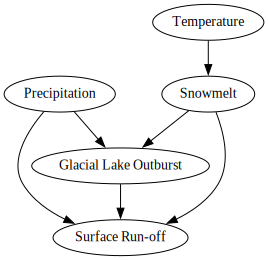

In [108]:
#Below is my generated Causal Graph. 
Intervention_Outcome = CausalGraphicalModel(
    nodes=["Temperature", "Surface Run-off", "Precipitation", "Glacial Lake Outburst", "Snowmelt"],
    edges=[
        ("Precipitation", "Glacial Lake Outburst"), 
        ("Precipitation", "Surface Run-off"),
        ("Glacial Lake Outburst", "Surface Run-off"),
        ("Snowmelt", "Glacial Lake Outburst"), 
        ("Temperature", "Snowmelt"),
        ("Snowmelt", "Surface Run-off")
    ]
)
Intervention_Outcome.draw()

- Outcome: Surface Run-off i.e. flooding that occurs due to excess precipitation on the surface
- Treatment: Glacial Lake Outburst
- Confounders: Precipitation and Snowmelt 
- Causal Grandparent: Temperature 

## STEP 2: mixed effect multi-linear regression:

In [145]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("sro ~ smlt+GLOF_occur+tp", KPK_2000_2022_subset, groups=KPK_2000_2022_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sro       
No. Observations: 7616    Method:             REML      
No. Groups:       14      Scale:              0.0007    
Min. group size:  544     Log-Likelihood:     16929.7887
Max. group size:  544     Converged:          Yes       
Mean group size:  544.0                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -0.007    0.001  -5.634 0.000 -0.009 -0.004
smlt          0.940    0.003 353.332 0.000  0.935  0.946
GLOF_occur    0.008    0.001   8.815 0.000  0.006  0.010
tp            0.028    0.002  13.907 0.000  0.024  0.032
Group Var     0.000    0.000                            



In [333]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("sro ~ GLOF_occur+tp+smlt+t2m", KPK_2000_2022_subset, groups=KPK_2000_2022_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sro       
No. Observations: 7616    Method:             REML      
No. Groups:       14      Scale:              0.0006    
Min. group size:  544     Log-Likelihood:     17094.9674
Max. group size:  544     Converged:          No        
Mean group size:  544.0                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -0.016    0.001 -11.361 0.000 -0.018 -0.013
GLOF_occur    0.005    0.001   5.922 0.000  0.004  0.007
tp            0.019    0.002   9.409 0.000  0.015  0.023
smlt          0.923    0.003 334.144 0.000  0.918  0.929
t2m           0.029    0.002  18.696 0.000  0.026  0.032
Group Var     0.000    0.000                            



### The above result corresponds to what World Weather Attribution found that tp -> floods more than GLOF_occur caused  floods

In [223]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("sro_binary ~ smlt_binary+GLOF_occur+tp", KPK_2000_2022_subset, groups=KPK_2000_2022_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sro_binary
No. Observations: 7616    Method:             REML      
No. Groups:       14      Scale:              0.0519    
Min. group size:  544     Log-Likelihood:     441.2103  
Max. group size:  544     Converged:          Yes       
Mean group size:  544.0                                 
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    -0.020    0.006  -3.349 0.001 -0.031 -0.008
smlt_binary   0.799    0.007 112.595 0.000  0.785  0.813
GLOF_occur    0.098    0.008  12.121 0.000  0.082  0.114
tp            0.186    0.017  10.862 0.000  0.152  0.219
Group Var     0.000    0.000                            



In [340]:
## Checking if snowmelt or precipitation caused GLOF

In [138]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("GLOF_occur ~ tp+smlt", KPK_2000_2022_subset, groups=KPK_2000_2022_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: GLOF_occur
No. Observations: 7616    Method:             REML      
No. Groups:       14      Scale:              0.1066    
Min. group size:  544     Log-Likelihood:     -2327.8462
Max. group size:  544     Converged:          No        
Mean group size:  544.0                                 
--------------------------------------------------------
              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept      0.103    0.065  1.575 0.115 -0.025  0.231
tp            -0.017    0.025 -0.659 0.510 -0.066  0.033
smlt           0.644    0.033 19.800 0.000  0.580  0.707
Group Var      0.059                                    



### Let's Perform Granger Causality now

### Hypothesis 1: 
      the amount of snowmelt is not predictive of the occurence of a Glacial Lake Outburst Flood. 

In [121]:
#Now let's apply granger causality on GLOF and smlt

#perform Granger-Causality test
grangercausalitytests(KPK_2000_2022_subset[['GLOF_occur', 'smlt']], maxlag=[7])


Granger Causality
number of lags (no zero) 7
ssr based F test:         F=63.2256 , p=0.0000  , df_denom=7594, df_num=7
ssr based chi2 test:   chi2=443.4534, p=0.0000  , df=7
likelihood ratio test: chi2=431.0122, p=0.0000  , df=7
parameter F test:         F=63.2256 , p=0.0000  , df_denom=7594, df_num=7


{7: ({'ssr_ftest': (63.22559727728784, 7.518370607319511e-89, 7594.0, 7),
   'ssr_chi2test': (443.45338264158306, 1.1302964492966798e-91, 7),
   'lrtest': (431.01222983903426, 5.296635427678261e-89, 7),
   'params_ftest': (63.225597277287584, 7.51837060732592e-89, 7594.0, 7.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

### Hypothesis 2: 
      the amount of snowmelt is not predictive of the future surface runoff. 

In [219]:
#Now let's apply granger causality on SRO and smlt

#perform Granger-Causality test
grangercausalitytests(KPK_2000_2022_subset[['sro_binary', 'smlt_binary']], maxlag=[4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=67.3296 , p=0.0000  , df_denom=7603, df_num=4
ssr based chi2 test:   chi2=269.6374, p=0.0000  , df=4
likelihood ratio test: chi2=264.9716, p=0.0000  , df=4
parameter F test:         F=67.3296 , p=0.0000  , df_denom=7603, df_num=4


{4: ({'ssr_ftest': (67.32964180321231, 4.442460340153897e-56, 7603.0, 4),
   'ssr_chi2test': (269.63737125137555, 3.818988042894084e-57, 4),
   'lrtest': (264.97159686682426, 3.868867651286492e-56, 4),
   'params_ftest': (67.32964180321217, 4.4424603401559175e-56, 7603.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

### Hypothesis 3: 
      the amount of precipitation is not predictive of GLOF occurence. 

In [125]:
#Now let's apply granger causality on GLOF and tp

#perform Granger-Causality test
grangercausalitytests(KPK_2000_2022_subset[['GLOF_occur', 'tp']], maxlag=[4])

#Precipitation occurs before GLOF_occur


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=119.3499, p=0.0000  , df_denom=7603, df_num=4
ssr based chi2 test:   chi2=477.9646, p=0.0000  , df=4
likelihood ratio test: chi2=463.5587, p=0.0000  , df=4
parameter F test:         F=119.3499, p=0.0000  , df_denom=7603, df_num=4


{4: ({'ssr_ftest': (119.34986722059382, 6.484345433236521e-99, 7603.0, 4),
   'ssr_chi2test': (477.9645872856294, 3.90380214310749e-102, 4),
   'lrtest': (463.5586534002323, 5.087000760675892e-99, 4),
   'params_ftest': (119.3498672205951, 6.4843454332217775e-99, 7603.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

### Checking for reverse

In [139]:
#Now let's apply granger causality on GLOF and tp

#perform Granger-Causality test
grangercausalitytests(KPK_2000_2022_subset[['tp', 'GLOF_occur']], maxlag=[4])

#Precipitation occurs before GLOF_occur


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=32.3894 , p=0.0000  , df_denom=7603, df_num=4
ssr based chi2 test:   chi2=129.7110, p=0.0000  , df=4
likelihood ratio test: chi2=128.6183, p=0.0000  , df=4
parameter F test:         F=32.3894 , p=0.0000  , df_denom=7603, df_num=4


{4: ({'ssr_ftest': (32.38941567834293, 8.218288670549465e-27, 7603.0, 4),
   'ssr_chi2test': (129.71102572329153, 4.489528981503455e-27, 4),
   'lrtest': (128.61826265641503, 7.689056204186476e-27, 4),
   'params_ftest': (32.38941567834305, 8.21828867054596e-27, 7603.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

## Performing Causal Inference using Microsoft DoWhy 

### Data preprocessing to fit the Do Why architecture

In [147]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur
0,2000-02-01,36.65,73.7,0.095608,0.000000,0.000000,0.113445,0.0
1,2000-03-01,36.65,73.7,0.220510,0.000000,0.000000,0.353000,0.0
2,2000-04-01,36.65,73.7,0.321810,0.000000,0.000000,0.050222,1.0
3,2000-05-01,36.65,73.7,0.513728,0.135630,0.145503,0.152333,1.0
4,2000-06-01,36.65,73.7,0.600315,0.133970,0.137930,0.228667,1.0
...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,0.444391,0.001417,0.001729,0.147444,1.0
7612,2022-06-01,35.95,75.0,0.524302,0.004979,0.006420,0.328445,0.0
7613,2022-07-01,35.95,75.0,0.654545,0.125224,0.228338,0.290778,0.0
7614,2022-08-01,35.95,75.0,0.646401,0.145196,0.315453,0.475667,0.0


In [148]:
KPK_2000_2022_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7616 entries, 0 to 7615
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        7616 non-null   object 
 1   latitude    7616 non-null   float64
 2   longitude   7616 non-null   float64
 3   t2m         7616 non-null   float64
 4   smlt        7616 non-null   float64
 5   sro         7616 non-null   float64
 6   tp          7616 non-null   float64
 7   GLOF_occur  7616 non-null   float64
dtypes: float64(7), object(1)
memory usage: 476.1+ KB


In [180]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur,sro_binary
0,2000-02-01,36.65,73.7,0.095608,0.000000,0.000000,0.113445,0.0,0
1,2000-03-01,36.65,73.7,0.220510,0.000000,0.000000,0.353000,0.0,0
2,2000-04-01,36.65,73.7,0.321810,0.000000,0.000000,0.050222,1.0,0
3,2000-05-01,36.65,73.7,0.513728,0.135630,0.145503,0.152333,1.0,1
4,2000-06-01,36.65,73.7,0.600315,0.133970,0.137930,0.228667,1.0,1
...,...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,0.444391,0.001417,0.001729,0.147444,1.0,0
7612,2022-06-01,35.95,75.0,0.524302,0.004979,0.006420,0.328445,0.0,0
7613,2022-07-01,35.95,75.0,0.654545,0.125224,0.228338,0.290778,0.0,1
7614,2022-08-01,35.95,75.0,0.646401,0.145196,0.315453,0.475667,0.0,1


In [179]:
KPK_2000_2022_subset['sro_binary'] = KPK_2000_2022_subset['sro'].apply(lambda x: 1 if x > KPK_2000_2022_subset['sro'].mean() else 0)

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/1965844945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KPK_2000_2022_subset['sro_binary'] = KPK_2000_2022_subset['sro'].apply(lambda x: 1 if x > KPK_2000_2022_subset['sro'].mean() else 0)


In [181]:
KPK_2000_2022_subset['smlt_binary'] = KPK_2000_2022_subset['smlt'].apply(lambda x: 1 if x > KPK_2000_2022_subset['smlt'].mean() else 0)

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/4123220407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KPK_2000_2022_subset['smlt_binary'] = KPK_2000_2022_subset['smlt'].apply(lambda x: 1 if x > KPK_2000_2022_subset['smlt'].mean() else 0)


In [221]:
KPK_2000_2022_subset['tp_binary'] = KPK_2000_2022_subset['tp'].apply(lambda x: 1 if x > KPK_2000_2022_subset['tp'].mean() else 0)

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/1988842772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  KPK_2000_2022_subset['tp_binary'] = KPK_2000_2022_subset['tp'].apply(lambda x: 1 if x > KPK_2000_2022_subset['tp'].mean() else 0)


### Hypothesis - 1: 
    Would increase in GLOF increase surface runoff

In [149]:
training= KPK_2000_2022_subset[['t2m','tp','GLOF_occur', 'smlt', 'sro' ]].copy()

In [150]:
#Creating the 
causal_graph = """
digraph {
smlt;
sro;
tp;
GLOF_occur;
t2m;
U[label="Unobserved Confounders"];
tp->sro;GLOF_occur->sro;t2m->smlt;tp->GLOF_occur;
smlt->GLOF_occur; smlt -> sro;
}
"""

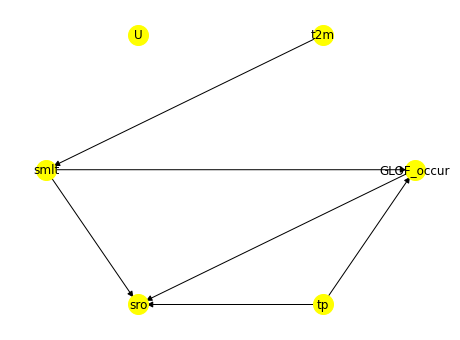

In [158]:
model_glof= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='GLOF_occur',
        outcome='sro')
model_glof.view_model()
#display(Image(filename="causal_model.png"))

In [159]:
#Identify the causal effect
estimands = model_glof.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
─────────────(E[sro|smlt,tp])
d[GLOF_occur]                
Estimand assumption 1, Unconfoundedness: If U→{GLOF_occur} and U→sro then P(sro|GLOF_occur,smlt,tp,U) = P(sro|GLOF_occur,smlt,tp)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [160]:
#Causal Effect Estimation
estimate = model_glof.estimate_effect(estimands,method_name = "backdoor.propensity_score_weighting") #backdoor.linear_regression
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
─────────────(E[sro|smlt,tp])
d[GLOF_occur]                
Estimand assumption 1, Unconfoundedness: If U→{GLOF_occur} and U→sro then P(sro|GLOF_occur,smlt,tp,U) = P(sro|GLOF_occur,smlt,tp)

## Realized estimand
b: sro~GLOF_occur+smlt+tp
Target units: ate

## Estimate
Mean value: 0.018142516948426064



In [167]:
refutel = model_glof.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.018142516948426064
New effect:0.018142516948426064
p value:2.0



In [166]:
refutel = model_glof.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.018142516948426064
New effect:0.017968170595521856
p value:0.8600000000000001



In [168]:
refutel = model_glof.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/dowhy/causal_estimators/propensity_score_weighting_estimator.py:224: RuntimeWarning: invalid value encountered in double_scalars
  est = data["d_y"].sum() / sum_dy_weights - data["dbar_y"].sum() / sum_dbary_weights


Refute: Use a Placebo Treatment
Estimated effect:0.018142516948426064
New effect:nan
p value:0.0



### Model 2: for snowmelt to surface runoff 

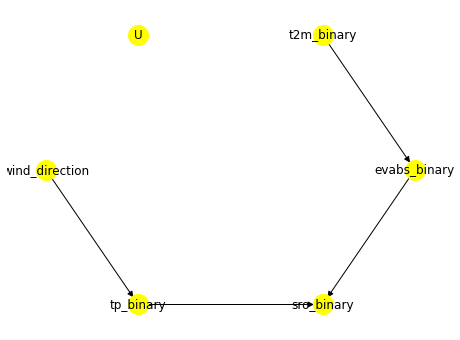

In [334]:
model_smlt= CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='smlt',
        outcome='sro')
model_smlt.view_model()
#display(Image(filename="causal_model.png"))

In [ ]:
#Identify the causal effect
estimands = model_smlt.identify_effect()
print(estimands)

In [192]:
#Causal Effect Estimation
estimate = model_smlt.estimate_effect(estimands,method_name = "backdoor.linear_regression")
#estimate = model_smlt.estimate_effect(estimands,method_name = "backdoor.distance_matching")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[sro_binary])
d[smlt_binary]               
Estimand assumption 1, Unconfoundedness: If U→{smlt_binary} and U→sro_binary then P(sro_binary|smlt_binary,,U) = P(sro_binary|smlt_binary,)

## Realized estimand
b: sro_binary~smlt_binary+smlt_binary*tp
Target units: ate

## Estimate
Mean value: 0.9433179542860318



#### Performing refute tests

In [171]:
refutel = model_smlt.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.46713231975986796
New effect:0.008226636773167702
p value:0.0



In [172]:
refutel = model_smlt.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.46713231975986796
New effect:0.008241898439589371
p value:0.0



In [173]:
refutel = model_smlt.refute_estimate(estimands,estimate, "placebo_treatment_refuter")


/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in doub

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in doub

Refute: Use a Placebo Treatment
Estimated effect:0.46713231975986796
New effect:9.228728892196614e-16
p value:0.0



/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in doub

In [174]:
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:0.46713231975986796
New effect:9.228728892196614e-16
p value:0.0



In [194]:
KPK_2000_2022_subset

,time,latitude,longitude,t2m,smlt,sro,tp,GLOF_occur,sro_binary,smlt_binary
0,2000-02-01,36.65,73.7,0.095608,0.000000,0.000000,0.113445,0.0,0,0
1,2000-03-01,36.65,73.7,0.220510,0.000000,0.000000,0.353000,0.0,0,0
2,2000-04-01,36.65,73.7,0.321810,0.000000,0.000000,0.050222,1.0,0,0
3,2000-05-01,36.65,73.7,0.513728,0.135630,0.145503,0.152333,1.0,1,1
4,2000-06-01,36.65,73.7,0.600315,0.133970,0.137930,0.228667,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...
7611,2022-05-01,35.95,75.0,0.444391,0.001417,0.001729,0.147444,1.0,0,0
7612,2022-06-01,35.95,75.0,0.524302,0.004979,0.006420,0.328445,0.0,0,0
7613,2022-07-01,35.95,75.0,0.654545,0.125224,0.228338,0.290778,0.0,1,1
7614,2022-08-01,35.95,75.0,0.646401,0.145196,0.315453,0.475667,0.0,1,1


### Model 3: Categorical variables for smlt and sro but with categorical data

In [206]:
training_binary = KPK_2000_2022_subset[['t2m','tp','GLOF_occur', 'smlt_binary', 'sro_binary' ]].copy()

In [213]:
training_binary.columns

Index(['t2m', 'tp', 'GLOF_occur', 'smlt_binary', 'sro_binary'], dtype='object')

In [207]:
#Creating the 
causal_graph = """
digraph {
smlt_binary;
sro_binary;
tp;
GLOF_occur;
t2m;
U[label="Unobserved Confounders"];
tp->sro_binary;GLOF_occur->sro_binary;t2m->smlt_binary;tp->GLOF_occur;
smlt_binary->GLOF_occur; smlt_binary -> sro_binary;
}
"""

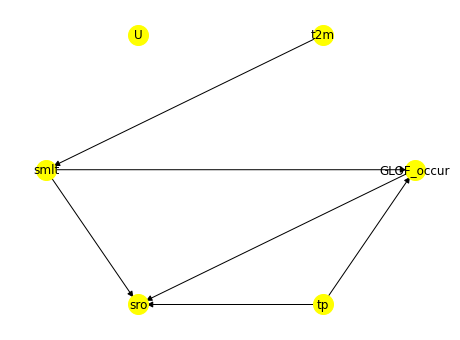

In [208]:
model_binary = CausalModel(
        data = training_binary,
        graph=causal_graph.replace("\n", " "),
        treatment='smlt_binary',
        outcome='sro_binary')
model_smlt.view_model()
#display(Image(filename="causal_model.png"))

In [209]:
#Identify the causal effect
estimands = model_binary.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[sro_binary])
d[smlt_binary]               
Estimand assumption 1, Unconfoundedness: If U→{smlt_binary} and U→sro_binary then P(sro_binary|smlt_binary,,U) = P(sro_binary|smlt_binary,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                          -1⎤
 ⎢  d                ⎛  d                  ⎞  ⎥
E⎢──────(sro_binary)⋅⎜──────([smlt_binary])⎟  ⎥
 ⎣d[t2m]             ⎝d[t2m]               ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→sro_binary then ¬(U →→{t2m})
Estimand assumption 2, Exclusion: If we remove {t2m}→{smlt_binary}, then ¬({t2m}→sro_binary)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [214]:
#Causal Effect Estimation
estimate = model_binary.estimate_effect(estimands,method_name = "backdoor.linear_regression")
#estimate = model_binary.estimate_effect(estimands,method_name = "backdoor.distance_matching")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[sro_binary])
d[smlt_binary]               
Estimand assumption 1, Unconfoundedness: If U→{smlt_binary} and U→sro_binary then P(sro_binary|smlt_binary,,U) = P(sro_binary|smlt_binary,)

## Realized estimand
b: sro_binary~smlt_binary+smlt_binary*tp
Target units: ate

## Estimate
Mean value: 0.8134600980768508



## Performing refute tests

In [216]:
refutel = model_binary.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.8134600980768508
New effect:0.8134795273945034
p value:0.84



In [215]:
refutel = model_binary.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.8134600980768508
New effect:0.8135692750893054
p value:0.94



In [218]:
refutel = model_binary.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)


Refute: Use a Placebo Treatment
Estimated effect:0.8134600980768508
New effect:-0.0003575069304851322
p value:1.0



### ---End of Causal inference for KPK Region---

## ---START of Causal Inference for SBS Region---

### Data preprocessing

In [224]:
SBS_2000_2022_lat26 = pd.read_csv('/Users/tabziasmac/Desktop/MLforCC/Project/Datasets_cleaned/SBS_2000_2022_lat_wise.csv')

In [225]:
SBS_2000_2022_lat26

,Unnamed: 0,index,latitude,longitude,time,u10,v10,d2m,t2m,evabs,...,slhf,ssr,str,sp,sro,ssrd,strd,tsn,e,tp
0,0,1632,29.35,63.0,2000-02-01,0.806985,-1.113916,264.78278,284.37958,0.000000,...,-102560.0,14325773.0,-10225515.0,90143.670,0.000000,19774482.0,22213994.0,273.15988,-0.000041,0.000030
1,1,1633,29.35,63.0,2000-03-01,0.594808,-0.860293,265.45743,289.48196,0.000000,...,-275324.0,17258508.0,-11441852.0,90002.516,0.000001,23651344.0,23987050.0,273.16058,-0.000110,0.000150
2,2,1634,29.35,63.0,2000-04-01,0.529654,-1.980999,268.42255,300.35687,0.000000,...,-239053.0,19990216.0,-13532116.0,89757.960,0.000000,27299742.0,28140014.0,273.15845,-0.000096,0.000003
3,3,1635,29.35,63.0,2000-05-01,1.686344,-2.393297,271.01160,304.82608,0.000000,...,-208509.0,21666638.0,-14349476.0,89387.016,0.000000,29450130.0,29930756.0,273.15988,-0.000084,0.000001
4,4,1636,29.35,63.0,2000-06-01,3.836625,-4.066630,271.91043,302.82950,0.000000,...,-174147.0,21835564.0,-13895843.0,89147.380,0.000000,29646460.0,28974246.0,273.15918,-0.000070,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191891,191891,958795,25.55,68.8,2022-05-01,3.621662,3.608687,291.91510,306.46216,-0.000020,...,-83470.0,21526602.0,-10150365.0,99816.080,0.000000,27524244.0,34485424.0,273.16130,-0.000033,0.000009
191892,191892,958796,25.55,68.8,2022-06-01,3.845413,3.695266,294.26447,306.45290,-0.000017,...,-89197.0,19851784.0,-8056821.0,99703.650,0.000000,25473342.0,36572264.0,273.15988,-0.000036,0.000020
191893,191893,958797,25.55,68.8,2022-07-01,1.471594,1.811439,298.35156,302.82486,-0.001695,...,-7088053.0,12250108.0,-2932954.5,99694.625,0.000316,15880452.0,38669720.0,273.15988,-0.002834,0.006833
191894,191894,958798,25.55,68.8,2022-08-01,1.191691,1.486686,297.94452,301.61050,-0.002002,...,-7572938.0,10292410.0,-2565675.5,99774.230,0.003338,13283698.0,37955240.0,273.16058,-0.003028,0.014439


In [226]:
SBS_2000_2022_lat_wise = SBS_2000_2022_lat26

In [227]:
SBS_2000_2022_lat25 = SBS_2000_2022_lat_wise.loc[(SBS_2000_2022_lat_wise['latitude'] == 25.55)]
SBS_2000_2022_lat26 = SBS_2000_2022_lat_wise.loc[(SBS_2000_2022_lat_wise['latitude'] == 26.55)]
SBS_2000_2022_lat27 = SBS_2000_2022_lat_wise.loc[(SBS_2000_2022_lat_wise['latitude'] == 27.55)]
SBS_2000_2022_lat28 = SBS_2000_2022_lat_wise.loc[(SBS_2000_2022_lat_wise['latitude'] == 28.55)]
SBS_2000_2022_lat29 = SBS_2000_2022_lat_wise.loc[(SBS_2000_2022_lat_wise['latitude'] == 29.35)]

In [336]:
#latitude 26.55

In [229]:
SBS_2000_2022_lat26

,Unnamed: 0,index,latitude,longitude,time,u10,v10,d2m,t2m,evabs,...,slhf,ssr,str,sp,sro,ssrd,strd,tsn,e,tp
2408,2408,9248,26.55,63.0,2000-02-01,0.664462,-1.232360,268.04855,288.16360,-2.216548e-07,...,-478155.0,16545888.0,-10710028.0,90552.370,5.736947e-07,19975654.0,24197756.0,273.15988,-0.000191,0.000172
2409,2409,9249,26.55,63.0,2000-03-01,1.177546,-0.620832,267.72723,292.88815,-2.954621e-07,...,-150285.0,20000648.0,-12595337.0,90423.520,0.000000e+00,24435784.0,25417522.0,273.16058,-0.000060,0.000044
2410,2410,9250,26.55,63.0,2000-04-01,1.895093,0.225329,274.56766,300.95422,-5.171169e-07,...,-814615.0,21884918.0,-13127126.0,90193.734,1.147389e-06,27107814.0,29432036.0,273.15845,-0.000326,0.000296
2411,2411,9251,26.55,63.0,2000-05-01,2.126559,1.721319,285.56543,303.99533,-6.649643e-07,...,-632783.0,22178632.0,-12539316.0,89847.414,1.147389e-06,27586754.0,33128220.0,273.15988,-0.000253,0.000244
2412,2412,9252,26.55,63.0,2000-06-01,1.682486,-0.027650,280.28607,303.81046,-5.909242e-07,...,-209464.0,22199898.0,-13022462.0,89580.695,0.000000e+00,27674794.0,32168678.0,273.15918,-0.000084,0.000035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191619,191619,956075,26.55,68.8,2022-05-01,1.751283,4.044481,287.36310,308.65630,-8.694036e-05,...,-465269.0,20411128.0,-12296923.0,99411.490,0.000000e+00,27853956.0,34926036.0,273.16130,-0.000186,0.000003
191620,191620,956076,26.55,68.8,2022-06-01,2.103412,4.588419,291.60413,308.04047,-6.825221e-05,...,-386523.0,19288832.0,-10027938.0,99294.130,0.000000e+00,26246778.0,36813790.0,273.15988,-0.000155,0.000035
191621,191621,956077,26.55,68.8,2022-07-01,0.185026,2.019358,298.70905,303.13684,-5.665538e-05,...,-8652952.0,12842754.0,-3150479.5,99381.125,7.287040e-05,17587556.0,38829388.0,273.15988,-0.003460,0.007910
191622,191622,956078,26.55,68.8,2022-08-01,0.235177,1.592898,297.99512,302.15356,-5.495641e-05,...,-7068963.0,10807615.0,-2979957.5,99462.375,2.507418e-04,14751774.0,38262960.0,273.16058,-0.002827,0.010201


In [232]:
def conditions(SBS_2000_2022_lat26):
    if ((SBS_2000_2022_lat26['u10'] < 0) & (SBS_2000_2022_lat26['v10'] > 0)):
        return 1
    else:
        return 0

In [233]:
SBS_2000_2022_lat26['wind_direction'] = SBS_2000_2022_lat26.apply(conditions, axis=1)

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/2382593589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBS_2000_2022_lat26['wind_direction'] = SBS_2000_2022_lat26.apply(conditions, axis=1)


In [237]:
SBS_2000_2022_lat26['wind_direction'].unique()

array([0, 1])

In [238]:
SBS_2000_2022_lat26.columns

Index(['Unnamed: 0', 'index', 'latitude', 'longitude', 'time', 'u10', 'v10',
       'd2m', 't2m', 'evabs', 'evaow', 'lmld', 'lmlt', 'lshf', 'lai_hv',
       'lai_lv', 'skt', 'snowc', 'sde', 'smlt', 'stl1', 'stl2', 'stl3', 'slhf',
       'ssr', 'str', 'sp', 'sro', 'ssrd', 'strd', 'tsn', 'e', 'tp',
       'wind_direction'],
      dtype='object')

In [239]:
SBS_2000_2022_lat26_subset = SBS_2000_2022_lat26[['time', 'latitude', 'longitude', 't2m', 'd2m', 'sro', 'tp', 'evabs', 'wind_direction']]

In [241]:
scaler = MinMaxScaler()

SBS_2000_2022_lat26_subset[['t2m', 'd2m', 'sro', 'tp', 'evabs']] = scaler.fit_transform(SBS_2000_2022_lat26_subset[['t2m', 'd2m', 'sro', 'tp', 'evabs',]])

/Users/tabziasmac/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr_type = dtype.construct_array_type()


In [242]:
#Create categorical variables 
SBS_2000_2022_lat26_subset['sro_binary'] = SBS_2000_2022_lat26_subset['sro'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['sro'].mean() else 0)

/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/3854248268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBS_2000_2022_lat26_subset['sro_binary'] = SBS_2000_2022_lat26_subset['sro'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['sro'].mean() else 0)


In [243]:
#Create categorical variables 
SBS_2000_2022_lat26_subset['t2m_binary'] = SBS_2000_2022_lat26_subset['t2m'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['t2m'].mean() else 0)
#Create categorical variables 
SBS_2000_2022_lat26_subset['d2m_binary'] = SBS_2000_2022_lat26_subset['d2m'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['d2m'].mean() else 0)
#Create categorical variables 
SBS_2000_2022_lat26_subset['tp_binary'] = SBS_2000_2022_lat26_subset['tp'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['tp'].mean() else 0)
#Create categorical variables 
SBS_2000_2022_lat26_subset['evabs_binary'] = SBS_2000_2022_lat26_subset['evabs'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['evabs'].mean() else 0)


/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/3798304167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBS_2000_2022_lat26_subset['t2m_binary'] = SBS_2000_2022_lat26_subset['t2m'].apply(lambda x: 1 if x > SBS_2000_2022_lat26_subset['t2m'].mean() else 0)
/var/folders/rd/hnv_76mx1j94l9w25qnm5r8m0000gn/T/ipykernel_24762/3798304167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SBS_2000_2022_lat26_subset['d2m_binary'] = SBS_2000_2022_lat26_subset['d2m'].apply(lambda x: 1 if x > SBS

In [246]:
SBS_2000_2022_lat26_subset

,time,latitude,longitude,t2m,d2m,sro,tp,evabs,wind_direction,sro_binary,t2m_binary,d2m_binary,tp_binary,evabs_binary
2408,2000-02-01,26.55,63.0,0.210369,0.185305,0.000159,0.012973,0.999925,0,0,0,0,0,1
2409,2000-03-01,26.55,63.0,0.379833,0.176797,0.000000,0.003315,0.999900,0,0,0,0,0,1
2410,2000-04-01,26.55,63.0,0.669153,0.357917,0.000318,0.022342,0.999825,0,0,1,0,0,1
2411,2000-05-01,26.55,63.0,0.778234,0.649114,0.000318,0.018379,0.999775,0,0,1,1,0,1
2412,2000-06-01,26.55,63.0,0.771603,0.509328,0.000000,0.002595,0.999800,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191619,2022-05-01,26.55,68.8,0.945417,0.696712,0.000000,0.000216,0.970615,0,0,1,1,0,0
191620,2022-06-01,26.55,68.8,0.923328,0.809006,0.000000,0.002595,0.976932,0,0,1,1,0,0
191621,2022-07-01,26.55,68.8,0.747441,0.997128,0.020165,0.597333,0.980851,0,1,1,1,1,0
191622,2022-08-01,26.55,68.8,0.712172,0.978225,0.069387,0.770378,0.981426,0,1,1,1,1,1


### Here's my DAG for this region:


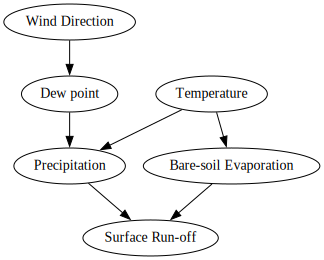

In [245]:
#Below is my generated Causal Graph. 
Intervention_Outcome_2 = CausalGraphicalModel(
    nodes=["Temperature", "Surface Run-off", "Precipitation", "Bare-soil Evaporation", "Dew point", "Wind Direction"],
    edges=[
        ("Dew point","Precipitation"), 
        ("Precipitation", "Surface Run-off"),
        ("Bare-soil Evaporation", "Surface Run-off"),
        ("Temperature","Precipitation"),
        ("Temperature", "Bare-soil Evaporation"),
        ("Wind Direction", "Dew point")
    ]
)
Intervention_Outcome_2.draw()

- Outcome: Surface runoff
- Treatment: Bare-soil Evaporation - as an indicator of soil aridity 
- Confounders: Temperature, Precipitation
- Causal Grandparents: Dew point and Wind Direction 

## STEP 2: Regression

In [247]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("sro ~ evabs+tp+t2m+d2m+wind_direction", SBS_2000_2022_lat26_subset, groups=SBS_2000_2022_lat26_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: sro       
No. Observations:   16048   Method:             REML      
No. Groups:         59      Scale:              0.0006    
Min. group size:    272     Log-Likelihood:     36705.1729
Max. group size:    272     Converged:          Yes       
Mean group size:    272.0                                 
----------------------------------------------------------
               Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       0.027    0.003   9.052 0.000  0.021  0.033
evabs          -0.026    0.003  -8.933 0.000 -0.032 -0.020
tp              0.420    0.003 147.723 0.000  0.415  0.426
t2m             0.031    0.001  24.026 0.000  0.028  0.033
d2m            -0.052    0.002 -32.296 0.000 -0.055 -0.048
wind_direction -0.004    0.001  -3.350 0.001 -0.006 -0.002
Group Var       0.000    0.000                            



In [339]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("tp_binary ~ wind_direction+evabs_binary", SBS_2000_2022_lat26_subset, groups=SBS_2000_2022_lat26_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: tp_binary 
No. Observations:   16048   Method:             REML      
No. Groups:         59      Scale:              0.1596    
Min. group size:    272     Log-Likelihood:     -8134.4684
Max. group size:    272     Converged:          Yes       
Mean group size:    272.0                                 
----------------------------------------------------------
               Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       0.423    0.016  27.029 0.000  0.392  0.453
wind_direction  0.190    0.019   9.995 0.000  0.152  0.227
evabs_binary   -0.243    0.011 -21.252 0.000 -0.265 -0.221
Group Var       0.008    0.004                            



Let's try with Binary Values 

In [248]:
#Now lets apply the mixed effect multi-linear regression:
#Implementing Mixed Effect Multiple Variable Linear Regression
md = smf.mixedlm("sro_binary ~ evabs_binary+tp_binary+t2m_binary+d2m_binary+wind_direction", SBS_2000_2022_lat26_subset, groups=SBS_2000_2022_lat26_subset["longitude"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: sro_binary
No. Observations:   16048   Method:             REML      
No. Groups:         59      Scale:              0.0381    
Min. group size:    272     Log-Likelihood:     3393.1481 
Max. group size:    272     Converged:          Yes       
Mean group size:    272.0                                 
----------------------------------------------------------
               Coef.  Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept       0.078    0.006  12.924 0.000  0.066  0.089
evabs_binary   -0.100    0.005 -18.817 0.000 -0.110 -0.090
tp_binary       0.229    0.004  58.543 0.000  0.221  0.236
t2m_binary      0.017    0.004   4.241 0.000  0.009  0.025
d2m_binary      0.002    0.004   0.417 0.677 -0.007  0.010
wind_direction  0.061    0.009   6.526 0.000  0.042  0.079
Group Var       0.000    0.000                            



### let's perform Granger causality 

### Hypothesis 1: 
    The amount of Bare-soil evaporation does not 'Granger-cause' or is predictive of Surface run-off

In [250]:
grangercausalitytests(SBS_2000_2022_lat26_subset[['sro_binary', 'evabs_binary']], maxlag=[3])


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.1369 , p=0.0000  , df_denom=16038, df_num=3
ssr based chi2 test:   chi2=45.4304 , p=0.0000  , df=3
likelihood ratio test: chi2=45.3662 , p=0.0000  , df=3
parameter F test:         F=15.1369 , p=0.0000  , df_denom=16038, df_num=3


{3: ({'ssr_ftest': (15.136865863922788, 7.80437049811955e-10, 16038.0, 3),
   'ssr_chi2test': (45.430417655563254, 7.495244389289563e-10, 3),
   'lrtest': (45.36622210585483, 7.734483833642821e-10, 3),
   'params_ftest': (15.136865863924243, 7.804370498107683e-10, 16038.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

p is > 0.05 -> Hence, granger-causality hypothesis accepted 

### Hypothesis 2: 
    The amount of Precipitation does not 'Granger-cause' or is predictive of Surface run-off

In [260]:
grangercausalitytests(SBS_2000_2022_lat26_subset[['sro', 'tp']], maxlag=[4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=102.7403, p=0.0000  , df_denom=16035, df_num=4
ssr based chi2 test:   chi2=411.1917, p=0.0000  , df=4
likelihood ratio test: chi2=406.0108, p=0.0000  , df=4
parameter F test:         F=102.7403, p=0.0000  , df_denom=16035, df_num=4


{4: ({'ssr_ftest': (102.74026430629222, 1.5462022799987831e-86, 16035.0, 4),
   'ssr_chi2test': (411.19171824886865, 1.0616332026285793e-87, 4),
   'lrtest': (406.0108354902477, 1.3980058151583039e-86, 4),
   'params_ftest': (102.7402643062918, 1.5462022800002772e-86, 16035.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

### Hypothesis 3: 
    The wind-direction does not 'Granger-cause' or is not predictive of Precipitation

In [267]:
grangercausalitytests(SBS_2000_2022_lat26_subset[['tp', 'wind_direction']], maxlag=[4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.6761  , p=0.0009  , df_denom=16035, df_num=4
ssr based chi2 test:   chi2=18.7149 , p=0.0009  , df=4
likelihood ratio test: chi2=18.7040 , p=0.0009  , df=4
parameter F test:         F=4.6761  , p=0.0009  , df_denom=16035, df_num=4


{4: ({'ssr_ftest': (4.676089809814265, 0.0009022802703374728, 16035.0, 4),
   'ssr_chi2test': (18.714857476435313, 0.0008940715758866086, 4),
   'lrtest': (18.70395078980073, 0.0008984872573396306, 4),
   'params_ftest': (4.676089809813538, 0.000902280270338356, 16035.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

#### Null Hypothesis Rejected as p < 0.05 ! Yay! 

#### Hence, this means that wind-direction is predictive of Precipitation

### Hypothesis 4: 
    Temperature does not 'Granger-cause' or is predictive of Bare-soil evaporation

In [264]:
grangercausalitytests(SBS_2000_2022_lat26_subset[['evabs', 't2m']], maxlag=[4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=101.2489, p=0.0000  , df_denom=16035, df_num=4
ssr based chi2 test:   chi2=405.2229, p=0.0000  , df=4
likelihood ratio test: chi2=400.1902, p=0.0000  , df=4
parameter F test:         F=101.2489, p=0.0000  , df_denom=16035, df_num=4


{4: ({'ssr_ftest': (101.24890892709185, 2.79472381804249e-85, 16035.0, 4),
   'ssr_chi2test': (405.222948506707, 2.068983417658325e-86, 4),
   'lrtest': (400.1901610449713, 2.530533665929333e-85, 4),
   'params_ftest': (101.24890892709038, 2.794723818052498e-85, 16035.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [263]:
grangercausalitytests(SBS_2000_2022_lat26_subset[['tp', 'sro']], maxlag=[4])


Granger Causality
number of lags (no zero) 4
ssr based F test:         F=27.7436 , p=0.0000  , df_denom=16035, df_num=4
ssr based chi2 test:   chi2=111.0366, p=0.0000  , df=4
likelihood ratio test: chi2=110.6541, p=0.0000  , df=4
parameter F test:         F=27.7436 , p=0.0000  , df_denom=16035, df_num=4


{4: ({'ssr_ftest': (27.743567977958378, 5.423193097997494e-23, 16035.0, 4),
   'ssr_chi2test': (111.03655868746222, 4.3742798877137924e-23, 4),
   'lrtest': (110.65409401261422, 5.278199105216044e-23, 4),
   'params_ftest': (27.743567977958175, 5.423193097997494e-23, 16035.0, 4.0)},
   array([[0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

### Now let's do CAUSAL INFERENCE on a few relationships 
- wind_direction on precipitation 
- evabs on surface runoff 
- precipitation on surface runoff 

In [306]:
training= SBS_2000_2022_lat26_subset.copy()

In [307]:
#Creating the 
causal_graph = """
digraph {
wind_direction;
tp_binary;
sro_binary;
evabs_binary;
t2m_binary
U[label="Unobserved Confounders"];
tp_binary->sro_binary;evabs_binary->sro_binary;t2m_binary->evabs_binary;
wind_direction->tp_binary;
}
"""

## Model 1: Evaporation from bare soil and Surface runoff

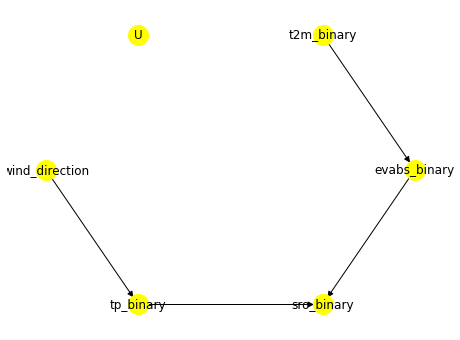

In [308]:
model_sbs_26 = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='evabs_binary',
        outcome='sro_binary')
model_sbs_26.view_model()
#display(Image(filename="causal_model.png"))

In [309]:
#Identify the causal effect
estimands = model_sbs_26.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[sro_binary])
d[|ev|_binary]               
Estimand assumption 1, Unconfoundedness: If U→{evabs_binary} and U→sro_binary then P(sro_binary|evabs_binary,,U) = P(sro_binary|evabs_binary,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                        -1⎤
 ⎢      d                   ⎛      d                     ⎞  ⎥
E⎢─────────────(sro_binary)⋅⎜─────────────([|ev|_binary])⎟  ⎥
 ⎣d[t2m_binary]             ⎝d[t2m_binary]               ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→sro_binary then ¬(U →→{t2m_binary})
Estimand assumption 2, Exclusion: If we remove {t2m_binary}→{evabs_binary}, then ¬({t2m_binary}→sro_binary)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [313]:
#Causal Effect Estimation
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.propensity_score_matching")
estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.linear_regression")
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.distance_matching")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[sro_binary])
d[|ev|_binary]               
Estimand assumption 1, Unconfoundedness: If U→{evabs_binary} and U→sro_binary then P(sro_binary|evabs_binary,,U) = P(sro_binary|evabs_binary,)

## Realized estimand
b: sro_binary~evabs_binary+evabs_binary*wind_direction+evabs_binary*tp_binary
Target units: ate

## Estimate
Mean value: -0.14166964287237777



### Running refute tests

In [316]:
refutel = model_sbs_26.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:-0.14166964287237777
New effect:-0.14167503536842574
p value:0.96



In [315]:
refutel = model_sbs_26.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:-0.14166964287237777
New effect:-0.14150065169783915
p value:0.98



In [314]:
refutel = model_sbs_26.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)



Refute: Use a Placebo Treatment
Estimated effect:-0.14166964287237777
New effect:0.0006123779696672108
p value:0.86



### Model 2: Wind_direction and precipitation

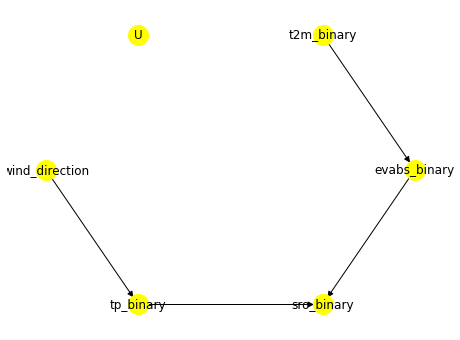

In [317]:
model_sbs_26_wind = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='wind_direction',
        outcome='tp_binary')
model_sbs_26_wind.view_model()
#display(Image(filename="causal_model.png"))

In [318]:
#Identify the causal effect
estimands = model_sbs_26_wind.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                      
─────────────────(E[tp_binary])
d[wind_direction]              
Estimand assumption 1, Unconfoundedness: If U→{wind_direction} and U→tp_binary then P(tp_binary|wind_direction,,U) = P(tp_binary|wind_direction,)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [321]:
#Causal Effect Estimation
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.propensity_score_matching")
estimate = model_sbs_26_wind.estimate_effect(estimands,method_name = "backdoor.linear_regression")
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.distance_matching")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                      
─────────────────(E[tp_binary])
d[wind_direction]              
Estimand assumption 1, Unconfoundedness: If U→{wind_direction} and U→tp_binary then P(tp_binary|wind_direction,,U) = P(tp_binary|wind_direction,)

## Realized estimand
b: tp_binary~wind_direction
Target units: ate

## Estimate
Mean value: 0.2370146207345278



In [322]:
refutel = model_sbs_26_wind.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.2370146207345278
New effect:0.23702335403413632
p value:1.0



In [324]:
refutel = model_sbs_26_wind.refute_estimate(estimands,estimate, "data_subset_refuter")
print(refutel)

Refute: Use a subset of data
Estimated effect:0.2370146207345278
New effect:0.23723924797958829
p value:0.94



In [323]:
refutel = model_sbs_26_wind.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:0.2370146207345278
New effect:-8.327392516946363e-07
p value:0.98



### Model three for precipitation and surface runoff 

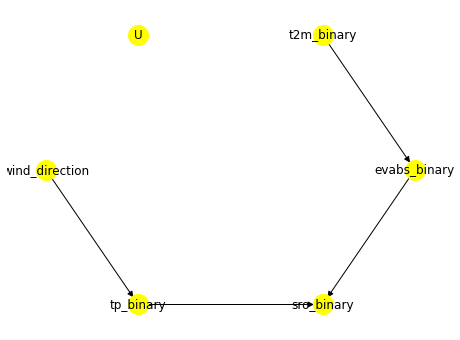

In [325]:
model_sbs_26_tp = CausalModel(
        data = training,
        graph=causal_graph.replace("\n", " "),
        treatment='tp_binary',
        outcome='sro_binary')
model_sbs_26_tp.view_model()
#display(Image(filename="causal_model.png"))

In [326]:
#Identify the causal effect
estimands = model_sbs_26_tp.identify_effect()
print(estimands)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[sro_binary])
d[tp_binary]               
Estimand assumption 1, Unconfoundedness: If U→{tp_binary} and U→sro_binary then P(sro_binary|tp_binary,,U) = P(sro_binary|tp_binary,)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                                                              -1⎤
 ⎢        d                     ⎛        d                     ⎞  ⎥
E⎢─────────────────(sro_binary)⋅⎜─────────────────([tp_binary])⎟  ⎥
 ⎣d[wind_direction]             ⎝d[wind_direction]             ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→sro_binary then ¬(U →→{wind_direction})
Estimand assumption 2, Exclusion: If we remove {wind_direction}→{tp_binary}, then ¬({wind_direction}→sro_binary)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [327]:
#Causal Effect Estimation
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.propensity_score_matching")
estimate = model_sbs_26_tp.estimate_effect(estimands,method_name = "backdoor.linear_regression")
#estimate = model_sbs_26.estimate_effect(estimands,method_name = "backdoor.distance_matching")

print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                     
────────────(E[sro_binary])
d[tp_binary]               
Estimand assumption 1, Unconfoundedness: If U→{tp_binary} and U→sro_binary then P(sro_binary|tp_binary,,U) = P(sro_binary|tp_binary,)

## Realized estimand
b: sro_binary~tp_binary+tp_binary*evabs_binary+tp_binary*t2m_binary
Target units: ate

## Estimate
Mean value: 0.21010414913967151



In [328]:
refutel = model_sbs_26_tp.refute_estimate(estimands,estimate, "random_common_cause")
print(refutel)

Refute: Add a random common cause
Estimated effect:0.21010414913967151
New effect:0.21010647787207679
p value:1.0



In [329]:
refutel = model_sbs_26_tp.refute_estimate(estimands,estimate, "placebo_treatment_refuter")
print(refutel)

Refute: Use a Placebo Treatment
Estimated effect:0.21010414913967151
New effect:-0.0002759491739967312
p value:0.96



---End of File---